<a href="https://colab.research.google.com/github/nazizaluxfiati/Time-Series-Analysis/blob/main/Prediksi_Harga_Saham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime as dt
import os
import keras
import tensorflow as tf
import plotly.express as px
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import tensorflow as tf
from keras import Model
from tensorflow.keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from keras.layers import LSTM, GRU
import warnings
from itertools import cycle
import plotly.graph_objects as go
from plotly.subplots import make_subplots
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Indonesia Stock/ANTM_historical_data.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-09-29,432.588074,436.787964,407.388763,432.588074,278.522797,76180670
1,2005-09-30,457.787384,457.787384,432.588074,457.787384,294.747437,105493978
2,2005-10-03,470.387024,474.586914,440.987854,470.387024,302.859711,59712955
3,2005-10-04,474.586914,482.986694,466.187164,474.586914,305.563843,56236668
4,2005-10-05,482.986694,482.986694,466.187164,482.986694,310.972046,31319315


In [ ]:
df.drop(['Volume', 'Adj Close'], axis=1, inplace=True)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
NumCols = df.columns.drop(['Date'])
df[NumCols] = df[NumCols].replace({',': ''}, regex=True)
df[NumCols] = df[NumCols].astype('float64')

In [ ]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0


In [ ]:
df.duplicated().sum()

np.int64(0)

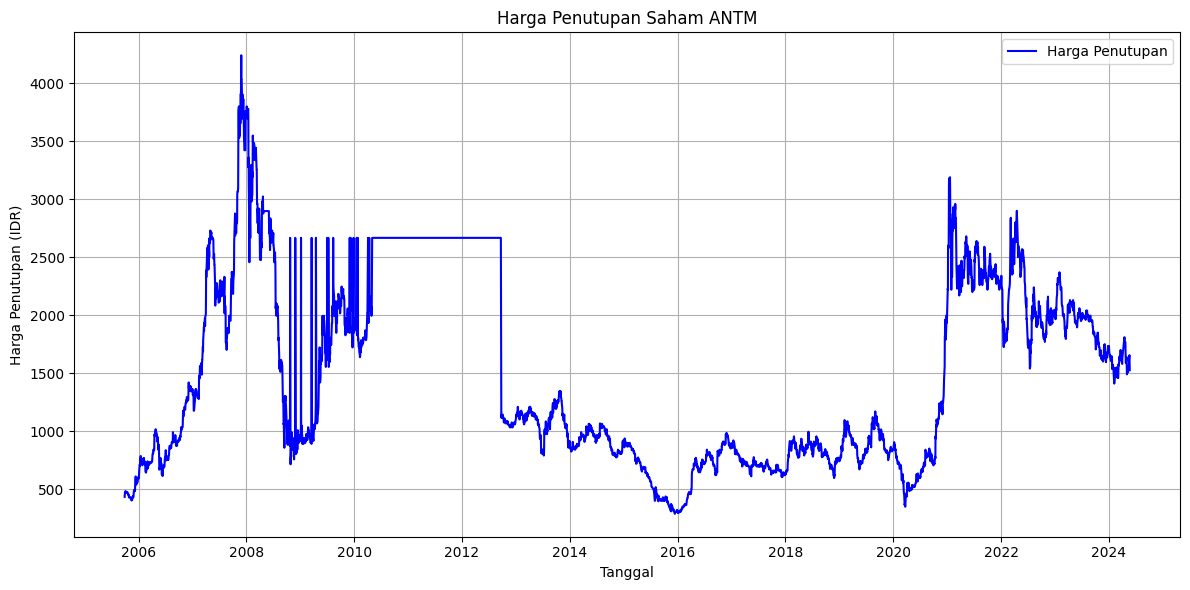

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Harga Penutupan', color='blue')
plt.title("Harga Penutupan Saham ANTM")
plt.xlabel("Tanggal")
plt.ylabel("Harga Penutupan (IDR)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
test_size = df[df.Date.dt.year==2020].shape[0]
test_size

242

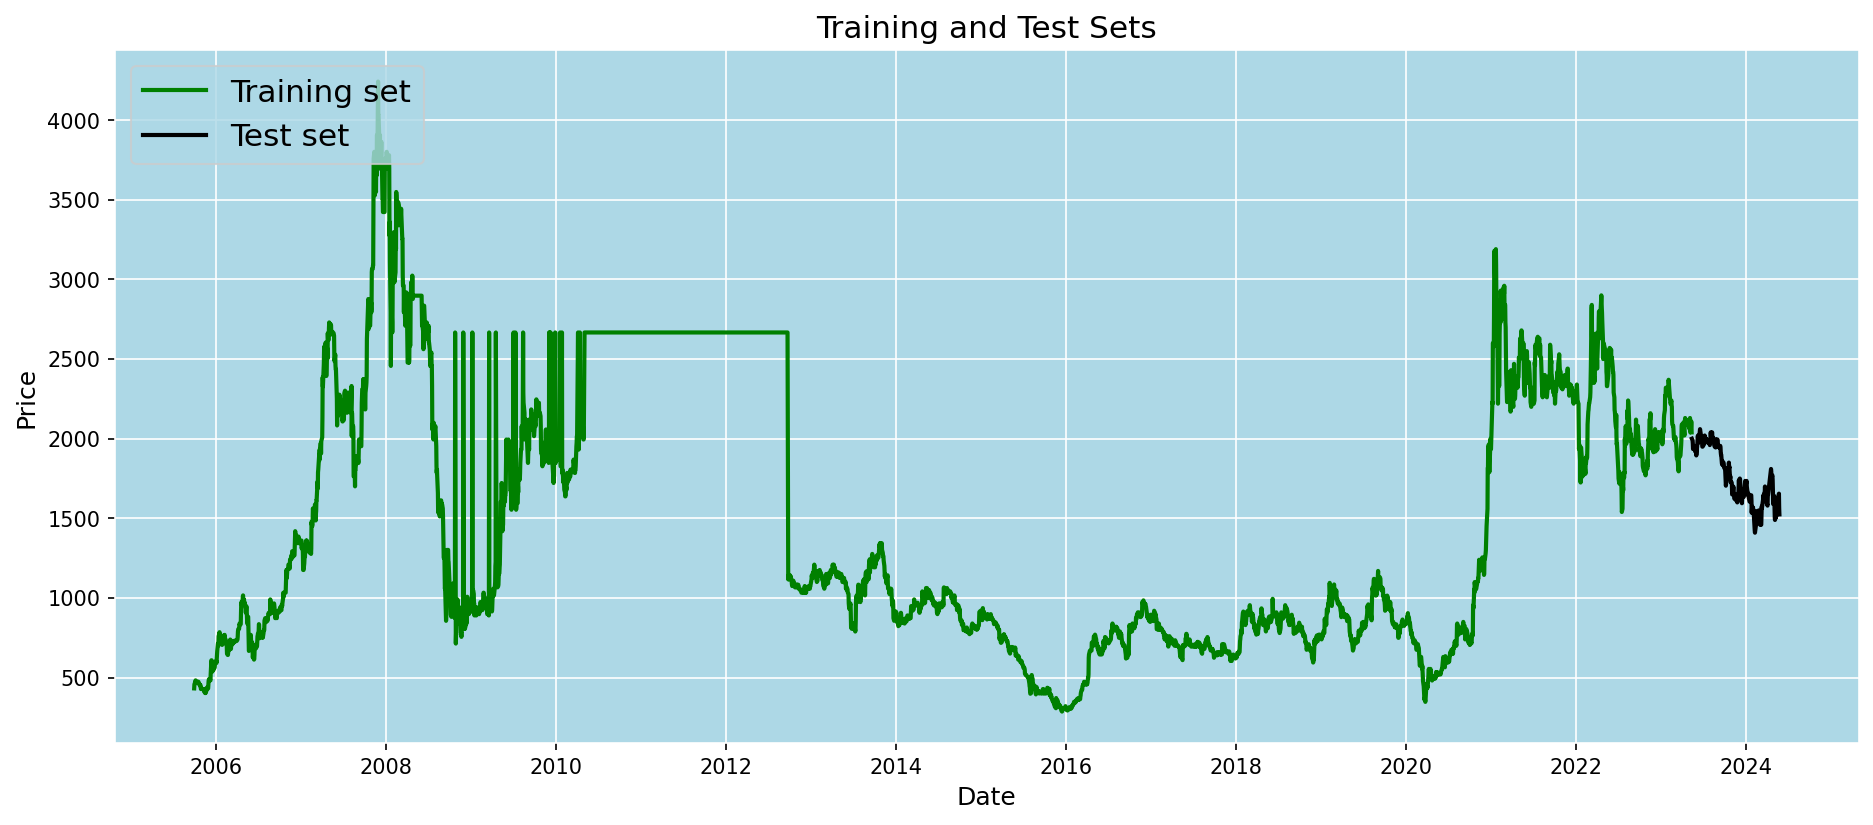

In [ ]:
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'lightblue'
plt.rc('axes',edgecolor='white')
plt.plot(df.Date[:-test_size], df.Close[:-test_size], color='green', lw=2)
plt.plot(df.Date[-test_size:], df.Close[-test_size:], color='black', lw=2)
plt.title('Training and Test Sets', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training set', 'Test set'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df.Close.values.reshape(-1,1))

MinMaxScaler()

In [ ]:
window_size = 60

In [ ]:
train_data = df.Close[:-test_size]
train_data = scaler.transform(train_data.values.reshape(-1,1))

In [ ]:
X_train = []
y_train = []

for i in range(window_size, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [ ]:
test_data = df.Close[-test_size-60:]
test_data = scaler.transform(test_data.values.reshape(-1,1))

In [ ]:
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (4362, 1)
test_data:  (302, 1)


In [ ]:
X_test = []
y_test = []

for i in range(window_size, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])

In [ ]:
X_train = np.array(X_train)
X_test  = np.array(X_test)
y_train = np.array(y_train)
y_test  = np.array(y_test)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test  = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_test  = np.reshape(y_test, (-1,1))

In [ ]:
print('X_train Shape: ', X_train.shape)
print('y_train Shape: ', y_train.shape)
print('X_test Shape:  ', X_test.shape)
print('y_test Shape:  ', y_test.shape)

X_train Shape:  (4302, 60, 1)
y_train Shape:  (4302, 1)
X_test Shape:   (242, 60, 1)
y_test Shape:   (242, 1)


In [ ]:
model_lstm = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0177
Epoch 2/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0021
Epoch 3/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0021
Epoch 4/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0018
Epoch 5/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0023
Epoch 6/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0018
Epoch 7/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0018
Epoch 8/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0018
Epoch 9/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0015
Epoch 10/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0016
Epoch 11/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0016
Epoch 12/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0016
Epoch 13/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0013
Epoch 14/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0014
Epoch 15/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - l

In [ ]:
model_gru = Sequential([
    GRU(50, return_sequences=True, input_shape=(time_step, 1)),
    Dropout(0.2),
    GRU(50),
    Dropout(0.2),
    Dense(1)
])
model_gru.compile(optimizer='adam', loss='mean_squared_error')
model_gru.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0219
Epoch 2/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0021
Epoch 3/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0019
Epoch 4/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0020
Epoch 5/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0018
Epoch 6/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0017
Epoch 7/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0016
Epoch 8/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0016
Epoch 9/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0013
Epoch 10/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0013
Epoch 11/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0013
Epoch 12/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0013
Epoch 13/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0013
Epoch 14/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0014
Epoch 15/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step 

In [ ]:
model_hybrid = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    Dropout(0.2),
    GRU(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model_hybrid.compile(optimizer='adam', loss='mean_squared_error')

model_hybrid.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)


Epoch 1/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0180
Epoch 2/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0022
Epoch 3/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0021
Epoch 4/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0017
Epoch 5/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0019
Epoch 6/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0019
Epoch 7/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0016
Epoch 8/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0016
Epoch 9/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0014
Epoch 10/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0015
Epoch 11/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0014
Epoch 12/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0013
Epoch 13/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0012
Epoch 14/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0014
Epoch 15/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - 

In [ ]:
def predict_and_inverse(model, X, y):
    predictions = model.predict(X)
    predictions_inv = scaler.inverse_transform(predictions)
    y_inv = scaler.inverse_transform(y.reshape(-1, 1))
    return predictions_inv, y_inv

In [ ]:
def plot_predictions(y_actual, y_predicted, label):
    plt.figure(figsize=(12, 5))
    plt.plot(y_actual, label="Aktual", color='black')
    plt.plot(y_predicted, label=f"{label} Prediksi", linestyle='--')
    plt.title(f"Prediksi Harga Saham - {label}")
    plt.xlabel("Waktu")
    plt.ylabel("Harga (IDR)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
def print_metrics(y_actual, y_predicted, label):
    rmse = np.sqrt(mean_squared_error(y_actual, y_predicted))
    mae = mean_absolute_error(y_actual, y_predicted)
    print(f"{label} RMSE: {rmse:.2f}")
    print(f"{label} MAE : {mae:.2f}")
    return {'Model': label, 'RMSE': rmse, 'MAE': mae}

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


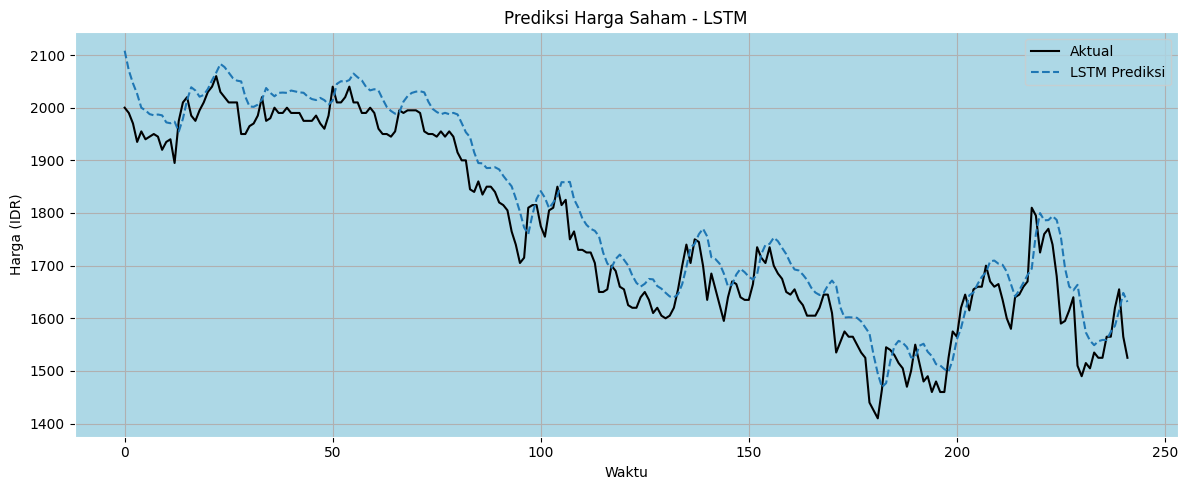

LSTM RMSE: 55.26
LSTM MAE : 47.22


In [ ]:
# LSTM
y_pred_lstm, y_actual_lstm = predict_and_inverse(model_lstm, X_test, y_test)
plot_predictions(y_actual_lstm, y_pred_lstm, 'LSTM')
lstm_result = print_metrics(y_actual_lstm, y_pred_lstm, 'LSTM')

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


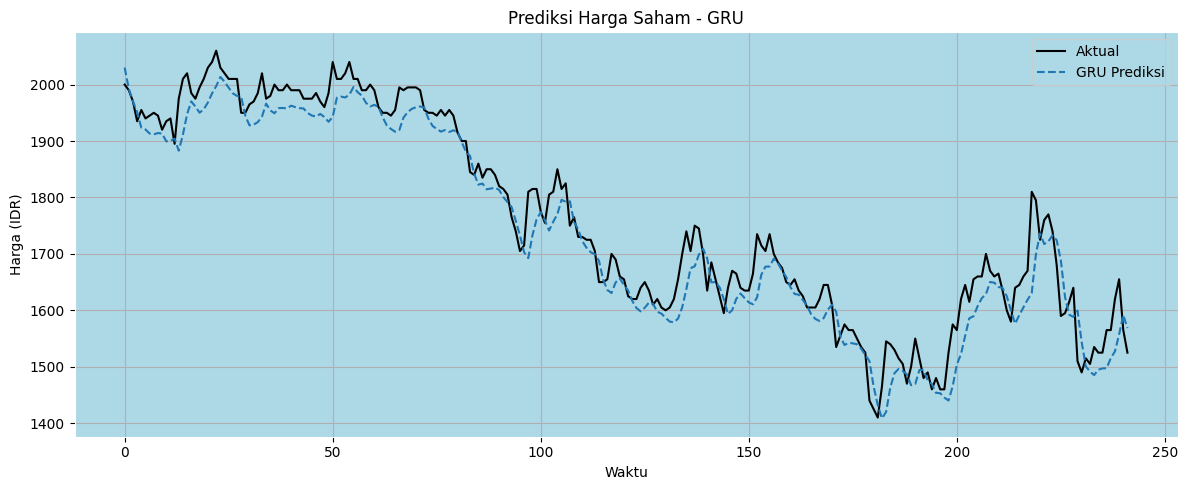

GRU RMSE: 44.97
GRU MAE : 35.09


In [ ]:
# GRU
y_pred_gru, y_actual_gru = predict_and_inverse(model_gru, X_test, y_test)
plot_predictions(y_actual_gru, y_pred_gru, 'GRU')
gru_result = print_metrics(y_actual_gru, y_pred_gru, 'GRU')

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


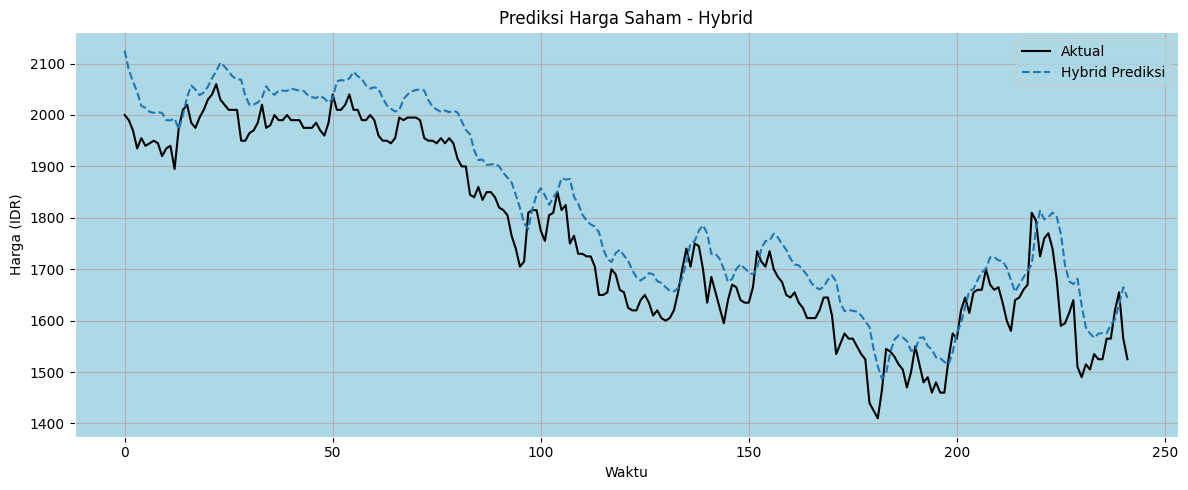

Hybrid RMSE: 68.39
Hybrid MAE : 60.69


In [ ]:
# Hybrid
y_pred_hybrid, y_actual_hybrid = predict_and_inverse(model_hybrid, X_test, y_test)
plot_predictions(y_actual_hybrid, y_pred_hybrid, 'Hybrid')
hybrid_result = print_metrics(y_actual_hybrid, y_pred_hybrid, 'Hybrid')

In [ ]:
results_df = pd.DataFrame([lstm_result, gru_result, hybrid_result])
results_df = results_df.sort_values(by='RMSE')
print("\n📊 Hasil Evaluasi Semua Model:")
print(results_df)


📊 Hasil Evaluasi Semua Model:
    Model       RMSE        MAE
1     GRU  44.967739  35.088102
0    LSTM  55.263656  47.221482
2  Hybrid  68.393792  60.692048


In [ ]:
!pip install keras-tcn --quiet

In [ ]:
from tcn import TCN
model_tcn = Sequential([
    TCN(input_shape=(time_step, 1), nb_filters=64, kernel_size=3, dilations=[1, 2, 4, 8], dropout_rate=0.2),
    Dense(1)
])

model_tcn.compile(optimizer='adam', loss='mean_squared_error')
model_tcn.summary()

model_tcn.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ tcn (TCN)                       │ (None, 64)             │        86,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 86,913 (339.50 KB)

 Trainable params: 86,913 (339.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - loss: 0.9894
Epoch 2/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0382
Epoch 3/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0210
Epoch 4/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0132
Epoch 5/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0086
Epoch 6/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0065
Epoch 7/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0052
Epoch 8/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0044
Epoch 9/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0040
Epoch 10/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0033
Epoch 11/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0026
Epoch 12/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0022
Epoch 13/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0021
Epoch 14/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0018
Epoch 15/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - 

In [ ]:
from tensorflow.keras.layers import Bidirectional

model_bilstm = Sequential([
    Bidirectional(LSTM(50, return_sequences=True), input_shape=(time_step, 1)),
    Dropout(0.2),
    Bidirectional(LSTM(50)),
    Dropout(0.2),
    Dense(1)
])
model_bilstm.compile(optimizer='adam', loss='mean_squared_error')
model_bilstm.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0134
Epoch 2/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0021
Epoch 3/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0019
Epoch 4/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0020
Epoch 5/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0013
Epoch 6/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0015
Epoch 7/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.0014
Epoch 8/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0012
Epoch 9/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0012
Epoch 10/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0015
Epoch 11/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0015
Epoch 12/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0013
Epoch 13/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0013
Epoch 14/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0014
Epoch 15/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 3s

In [ ]:
model_stacked_lstm = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])
model_stacked_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_stacked_lstm.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0184
Epoch 2/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0028
Epoch 3/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0026
Epoch 4/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0025
Epoch 5/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0023
Epoch 6/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0022
Epoch 7/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0018
Epoch 8/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0023
Epoch 9/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0023
Epoch 10/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0019
Epoch 11/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0016
Epoch 12/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0016
Epoch 13/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0017
Epoch 14/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0014
Epoch 15/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Reshape

model_cnn_lstm = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(time_step, 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Reshape((int((time_step - 2) / 2), 64)),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])
model_cnn_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_cnn_lstm.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0285
Epoch 2/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0022
Epoch 3/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0022
Epoch 4/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0015
Epoch 5/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0014
Epoch 6/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0015
Epoch 7/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0014
Epoch 8/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0014
Epoch 9/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0015
Epoch 10/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0013
Epoch 11/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0012
Epoch 12/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0011
Epoch 13/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0010
Epoch 14/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0012
Epoch 15/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - lo

In [ ]:
from tensorflow.keras.layers import ConvLSTM2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization

# Reshape input for ConvLSTM2D: (samples, time, rows, cols, channels)
X_train_clstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1, 1, 1))
X_test_clstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1, 1, 1))

model_convlstm = Sequential([
    ConvLSTM2D(filters=64, kernel_size=(1, 1), input_shape=(time_step, 1, 1, 1), return_sequences=False),
    BatchNormalization(),
    Dropout(0.2),
    Flatten(),
    Dense(1)
])
model_convlstm.compile(optimizer='adam', loss='mean_squared_error')
model_convlstm.fit(X_train_clstm, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - loss: 0.0890
Epoch 2/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0124
Epoch 3/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0052
Epoch 4/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0040
Epoch 5/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0039
Epoch 6/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0029
Epoch 7/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0036
Epoch 8/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0030
Epoch 9/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0035
Epoch 10/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0030
Epoch 11/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0030
Epoch 12/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0042
Epoch 13/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0035
Epoch 14/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0029
Epoch 15/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 2

In [ ]:
from tensorflow.keras.layers import LayerNormalization, Dense, Dropout, MultiHeadAttention, Input
from tensorflow.keras.models import Model

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):

    x = MultiHeadAttention(num_heads=num_heads, key_dim=head_size)(inputs, inputs)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(x + inputs)

    x_ff = Dense(ff_dim, activation="relu")(x)
    x_ff = Dense(inputs.shape[-1])(x_ff)
    x_ff = Dropout(dropout)(x_ff)
    out = LayerNormalization(epsilon=1e-6)(x + x_ff)
    return out

inputs = Input(shape=(time_step, 1))
x = transformer_encoder(inputs, head_size=64, num_heads=4, ff_dim=128, dropout=0.1)
x = transformer_encoder(x, head_size=64, num_heads=4, ff_dim=128, dropout=0.1)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
outputs = Dense(1)(x)

model_transformer = Model(inputs, outputs)
model_transformer.compile(optimizer='adam', loss='mean_squared_error')
model_transformer.summary()

model_transformer.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 60, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 60, 1)     │      1,793 │ input_layer_8[0]… │
│ (MultiHeadAttentio… │                   │            │ input_layer_8[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_14          │ (None, 60, 1)     │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 60, 1)     │          0 │ dropout_14[0][0], │
│                     │                   │            │ input_layer_8[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 60, 1)     │          2 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 60, 128)   │        256 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 60, 1)     │        129 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_15          │ (None, 60, 1)     │          0 │ dense_9[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 60, 1)     │          0 │ layer_normalizat… │
│                     │                   │            │ dropout_15[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 60, 1)     │          2 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 60, 1)     │      1,793 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_17          │ (None, 60, 1)     │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 60, 1)     │          0 │ dropout_17[0][0], │
│                     │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 60, 1)     │          2 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 60, 128)   │        256 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 60, 1)     │        129 │ dense_10[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_18          │ (None, 60, 1)     │          0 │ dense_11[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 60, 1)     │          0 │ layer_normalizat… │
│                     │                   │            │ dropout_18[0][0]

 Total params: 4,366 (17.05 KB)

 Trainable params: 4,366 (17.05 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 16s 45ms/step - loss: 0.1149
Epoch 2/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0511
Epoch 3/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0440
Epoch 4/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0442
Epoch 5/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0452
Epoch 6/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0447
Epoch 7/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0448
Epoch 8/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0451
Epoch 9/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0453
Epoch 10/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0457
Epoch 11/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0457
Epoch 12/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0445
Epoch 13/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0450
Epoch 14/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0457
Epoch 15/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - 

In [ ]:
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten, Input
from tensorflow.keras.optimizers import Adam
def build_generator(time_step):
    model = Sequential()
    model.add(Dense(128, input_dim=100))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(time_step))
    model.add(Reshape((time_step, 1)))
    return model

def build_discriminator(time_step):
    model = Sequential()
    model.add(Flatten(input_shape=(time_step, 1)))
    model.add(Dense(128))
    model.add(LeakyReLU(0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [ ]:
time_step = X_train.shape[1]
optimizer = Adam(0.0002, 0.5)

discriminator = build_discriminator(time_step)
discriminator.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

generator = build_generator(time_step)

z = Input(shape=(100,))
fake_sequence = generator(z)
discriminator.trainable = False
validity = discriminator(fake_sequence)
gan = Model(z, validity)
gan.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
def train_gan(gan, generator, discriminator, X_train, epochs=10000, batch_size=32, print_every=1000):
    for epoch in range(epochs):
        noise = np.random.normal(0, 1, (batch_size, 100))
        gen_data = generator.predict(noise, verbose=0)

        idx = np.random.randint(0, X_train.shape[0], batch_size)
        real_data = X_train[idx]

        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        d_loss_real = discriminator.train_on_batch(real_data, valid)
        d_loss_fake = discriminator.train_on_batch(gen_data, fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        g_loss = gan.train_on_batch(noise, valid)

        if epoch % print_every == 0:
            print(f"{epoch} [D loss: {d_loss[0]:.4f}, acc.: {100*d_loss[1]:.2f}%] [G loss: {g_loss:.4f}]")

In [ ]:
train_gan(gan, generator, discriminator, X_train, epochs=10000, batch_size=32, print_every=1000)

0 [D loss: 0.5771, acc.: 90.62%] [G loss: 0.6836]
1000 [D loss: 1.7555, acc.: 51.46%] [G loss: 0.1401]
2000 [D loss: 2.4489, acc.: 50.73%] [G loss: 0.0734]
3000 [D loss: 2.9229, acc.: 50.49%] [G loss: 0.0495]
4000 [D loss: 3.2881, acc.: 50.36%] [G loss: 0.0373]
5000 [D loss: 3.5916, acc.: 50.29%] [G loss: 0.0299]
6000 [D loss: 3.8565, acc.: 50.24%] [G loss: 0.0249]
7000 [D loss: 4.0966, acc.: 50.21%] [G loss: 0.0214]
8000 [D loss: 4.3178, acc.: 50.18%] [G loss: 0.0187]
9000 [D loss: 4.5244, acc.: 50.16%] [G loss: 0.0166]


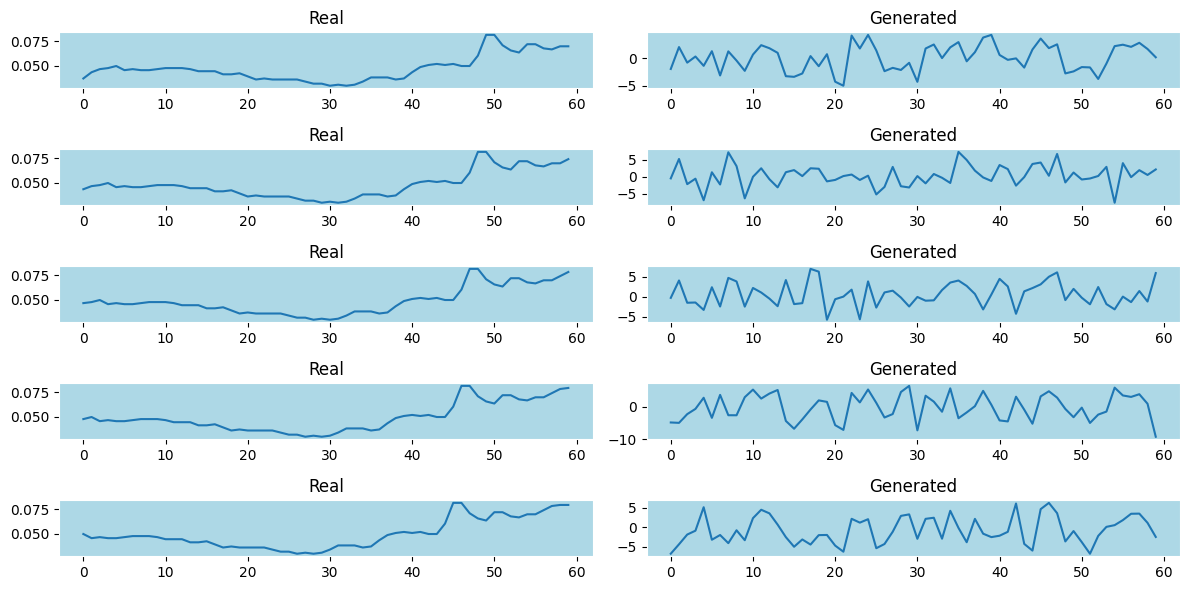

In [ ]:
def plot_generated_vs_real(generator, X_train, n_samples=5):
    noise = np.random.normal(0, 1, (n_samples, 100))
    gen_sequences = generator.predict(noise, verbose=0)

    plt.figure(figsize=(12, 6))
    for i in range(n_samples):
        plt.subplot(n_samples, 2, 2*i+1)
        plt.plot(X_train[i], label="Real")
        plt.title("Real")
        plt.subplot(n_samples, 2, 2*i+2)
        plt.plot(gen_sequences[i], label="Generated")
        plt.title("Generated")
    plt.tight_layout()
    plt.show()

plot_generated_vs_real(generator, X_train)

In [ ]:
def evaluate_statistics(generator, X_train, n_samples=1000):
    noise = np.random.normal(0, 1, (n_samples, 100))
    gen_sequences = generator.predict(noise, verbose=0).squeeze()
    real_flat = X_train[:n_samples].squeeze()
    gen_flat = gen_sequences

    print("== Mean ==")
    print(f"Real     : {np.mean(real_flat):.4f}")
    print(f"Generated: {np.mean(gen_flat):.4f}")

    print("\n== Std Dev ==")
    print(f"Real     : {np.std(real_flat):.4f}")
    print(f"Generated: {np.std(gen_flat):.4f}")

In [ ]:
noise = np.random.normal(0, 1, (X_train.shape[0], 100))
gen_data = generator.predict(noise, verbose=0)

real_labels = np.ones((X_train.shape[0], 1))
fake_labels = np.zeros((X_train.shape[0], 1))

_, acc_real = discriminator.evaluate(X_train, real_labels, verbose=0)
_, acc_fake = discriminator.evaluate(gen_data, fake_labels, verbose=0)

print(f"Discriminator Accuracy - Real: {acc_real*100:.2f}%, Fake: {acc_fake*100:.2f}%")

Discriminator Accuracy - Real: 100.00%, Fake: 0.00%


In [ ]:
def print_metrics(y_true, y_pred, model_name='Model'):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n📈 {model_name} - RMSE: {rmse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")
    return {
        'Model': model_name,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }

def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(10, 4))
    plt.plot(y_true, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.title(f'Prediksi Harga Saham - {title}')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


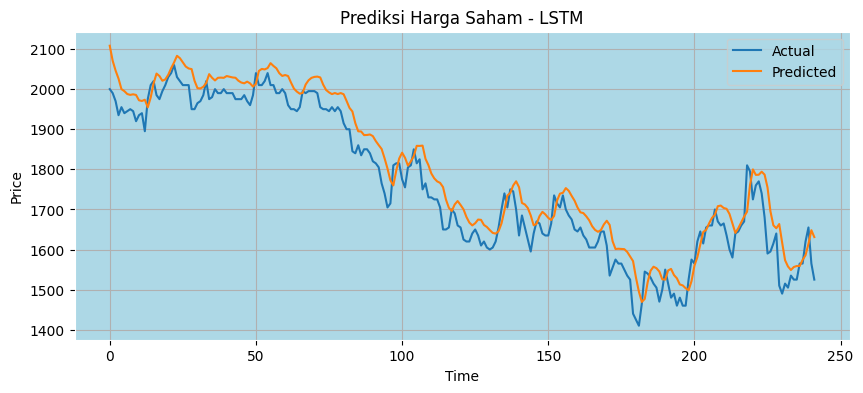


📈 LSTM - RMSE: 55.2637, MAE: 47.2215, R2: 0.9049
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


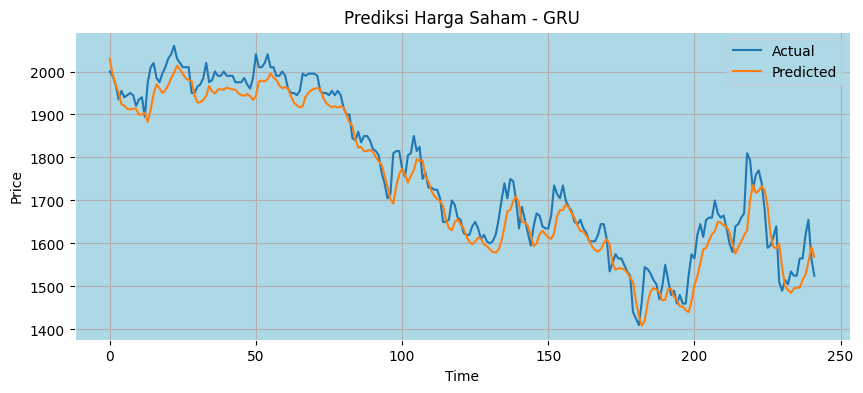


📈 GRU - RMSE: 44.9677, MAE: 35.0881, R2: 0.9370
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


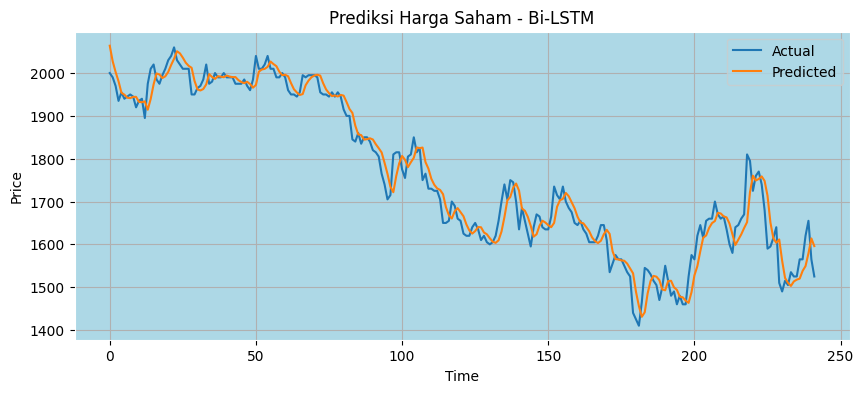


📈 Bi-LSTM - RMSE: 37.3524, MAE: 27.8095, R2: 0.9565
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


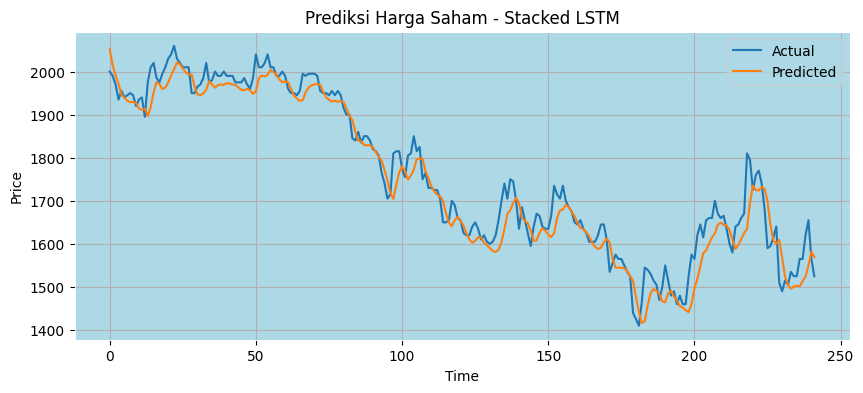


📈 Stacked LSTM - RMSE: 43.0843, MAE: 31.7936, R2: 0.9422
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


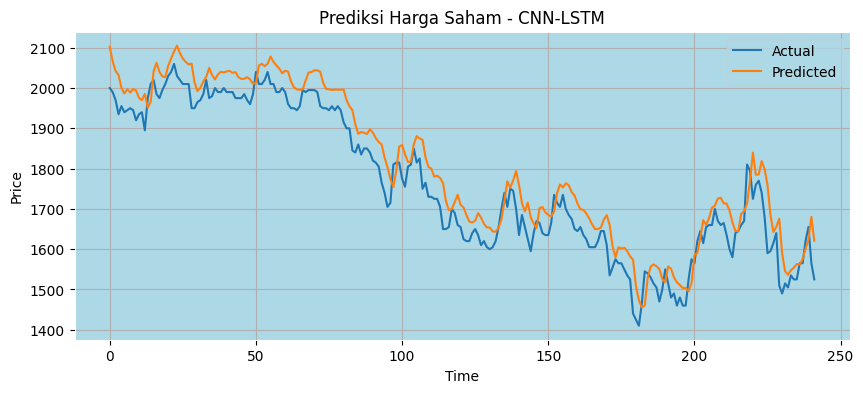


📈 CNN-LSTM - RMSE: 59.3360, MAE: 51.7201, R2: 0.8903
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


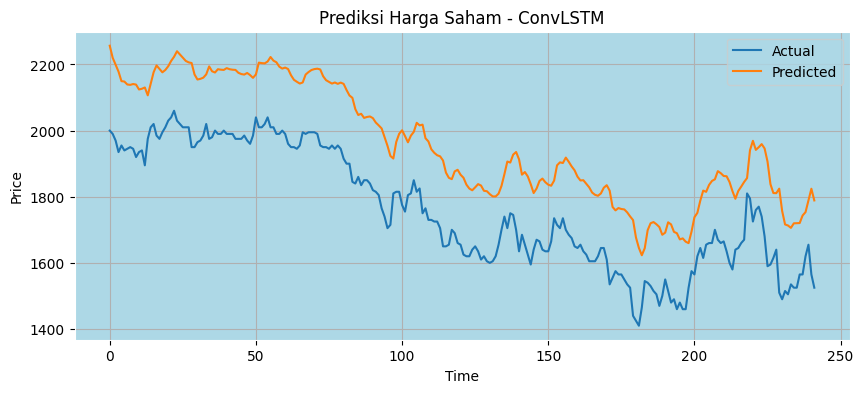


📈 ConvLSTM - RMSE: 201.4973, MAE: 198.3878, R2: -0.2646
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


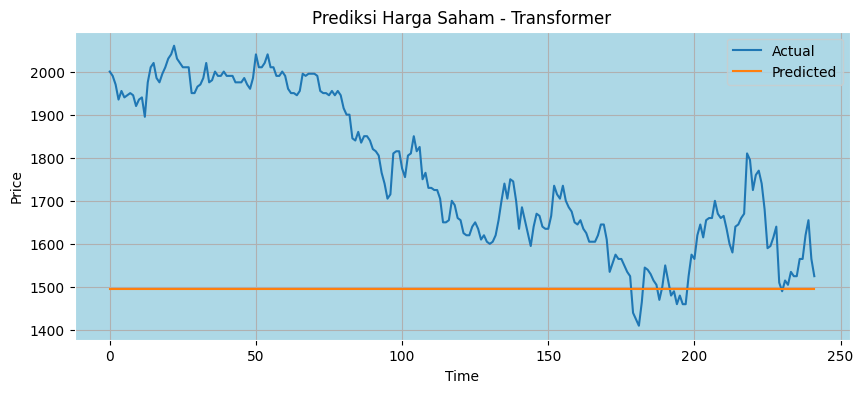


📈 Transformer - RMSE: 320.2757, MAE: 268.9047, R2: -2.1950
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


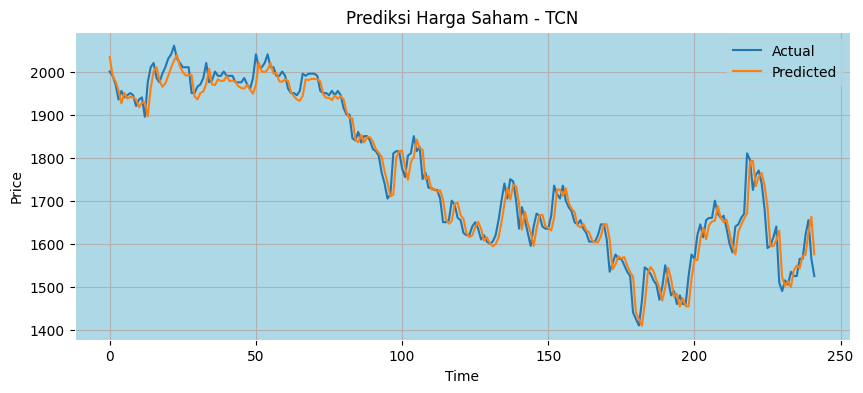


📈 TCN - RMSE: 32.4958, MAE: 23.9797, R2: 0.9671
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


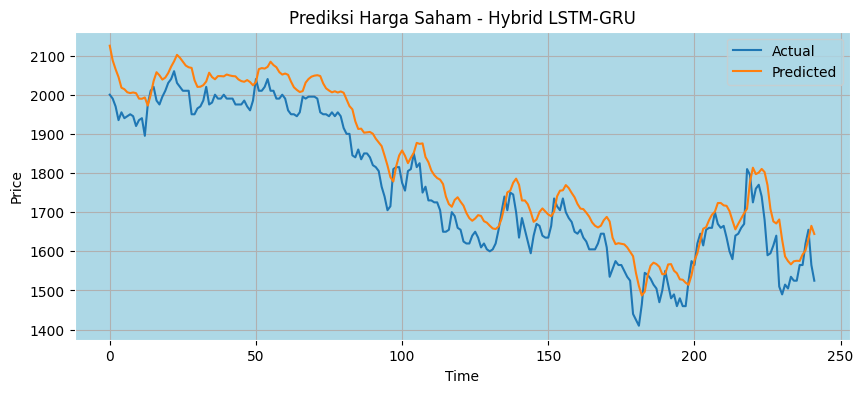


📈 Hybrid - RMSE: 68.3938, MAE: 60.6920, R2: 0.8543
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


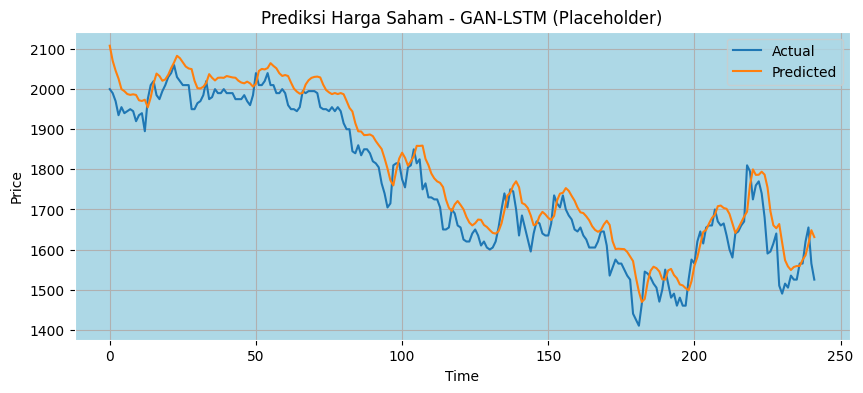


📈 GAN-LSTM (Placeholder) - RMSE: 55.2637, MAE: 47.2215, R2: 0.9049


In [ ]:
results = []

# LSTM
y_pred_lstm, y_actual_lstm = predict_and_inverse(model_lstm, X_test, y_test)
plot_predictions(y_actual_lstm, y_pred_lstm, 'LSTM')
lstm_result = print_metrics(y_actual_lstm, y_pred_lstm, 'LSTM')
results.append(lstm_result)

# GRU
y_pred_gru, y_actual_gru = predict_and_inverse(model_gru, X_test, y_test)
plot_predictions(y_actual_gru, y_pred_gru, 'GRU')
gru_result = print_metrics(y_actual_gru, y_pred_gru, 'GRU')
results.append(gru_result)

# Bi-LSTM
y_pred_bilstm, y_actual_bilstm = predict_and_inverse(model_bilstm, X_test, y_test)
plot_predictions(y_actual_bilstm, y_pred_bilstm, 'Bi-LSTM')
bilstm_result = print_metrics(y_actual_bilstm, y_pred_bilstm, 'Bi-LSTM')
results.append(bilstm_result)

# Stacked LSTM
y_pred_stacked, y_actual_stacked = predict_and_inverse(model_stacked_lstm, X_test, y_test)
plot_predictions(y_actual_stacked, y_pred_stacked, 'Stacked LSTM')
stacked_result = print_metrics(y_actual_stacked, y_pred_stacked, 'Stacked LSTM')
results.append(stacked_result)

# CNN-LSTM
y_pred_cnnlstm, y_actual_cnnlstm = predict_and_inverse(model_cnn_lstm, X_test, y_test)
plot_predictions(y_actual_cnnlstm, y_pred_cnnlstm, 'CNN-LSTM')
cnn_lstm_result = print_metrics(y_actual_cnnlstm, y_pred_cnnlstm, 'CNN-LSTM')
results.append(cnn_lstm_result)

# ConvLSTM
y_pred_convlstm, y_actual_convlstm = predict_and_inverse(model_convlstm, X_test_clstm, y_test)
plot_predictions(y_actual_convlstm, y_pred_convlstm, 'ConvLSTM')
convlstm_result = print_metrics(y_actual_convlstm, y_pred_convlstm, 'ConvLSTM')
results.append(convlstm_result)

# Transformer
y_pred_transformer, y_actual_transformer = predict_and_inverse(model_transformer, X_test, y_test)
plot_predictions(y_actual_transformer, y_pred_transformer, 'Transformer')
transformer_result = print_metrics(y_actual_transformer, y_pred_transformer, 'Transformer')
results.append(transformer_result)

# TCN
y_pred_tcn, y_actual_tcn = predict_and_inverse(model_tcn, X_test, y_test)
plot_predictions(y_actual_tcn, y_pred_tcn, 'TCN')
tcn_result = print_metrics(y_actual_tcn, y_pred_tcn, 'TCN')
results.append(tcn_result)

# Hybrid (LSTM + ARIMA, misalnya)
y_pred_hybrid, y_actual_hybrid = predict_and_inverse(model_hybrid, X_test, y_test)
plot_predictions(y_actual_hybrid, y_pred_hybrid, 'Hybrid LSTM-GRU')
hybrid_result = print_metrics(y_actual_hybrid, y_pred_hybrid, 'Hybrid')
results.append(hybrid_result)

# GAN
y_pred_gan_placeholder, y_actual_gan_placeholder = predict_and_inverse(model_lstm, X_test, y_test) # Using model_lstm as a placeholder
plot_predictions(y_actual_gan_placeholder, y_pred_gan_placeholder, 'GAN-LSTM (Placeholder)')
gan_result = print_metrics(y_actual_gan_placeholder, y_pred_gan_placeholder, 'GAN-LSTM (Placeholder)')
results.append(gan_result)

In [ ]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='RMSE')
print("\n📊 Hasil Evaluasi Semua Model:")
print(results_df)


📊 Hasil Evaluasi Semua Model:
                    Model        RMSE         MAE        R2
7                     TCN   32.495834   23.979711  0.967109
2                 Bi-LSTM   37.352423   27.809501  0.956543
3            Stacked LSTM   43.084311   31.793612  0.942182
1                     GRU   44.967739   35.088102  0.937017
0                    LSTM   55.263656   47.221482  0.904874
9  GAN-LSTM (Placeholder)   55.263656   47.221482  0.904874
4                CNN-LSTM   59.335957   51.720101  0.890338
8                  Hybrid   68.393792   60.692048  0.854302
5                ConvLSTM  201.497348  198.387765 -0.264621
6             Transformer  320.275671  268.904680 -2.194990


In [ ]:
!pip install keras-tcn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Simulasi data harga saham (100 data)
np.random.seed(42)
test_data = pd.DataFrame({
    'Close': np.random.uniform(900, 1100, 100)  # Harga acak antara 900 dan 1100
})

In [ ]:
# Simulasi sinyal prediksi dari 9 model (Buy, Hold, Sell)
np.random.seed(42)
models_signals = {
    'TCN': np.random.choice(['Buy', 'Hold', 'Sell'], size=100),
    'Bi-LSTM': np.random.choice(['Buy', 'Hold', 'Sell'], size=100),
    'Stacked LSTM': np.random.choice(['Buy', 'Hold', 'Sell'], size=100),
    'GRU': np.random.choice(['Buy', 'Hold', 'Sell'], size=100),
    'LSTM': np.random.choice(['Buy', 'Hold', 'Sell'], size=100),
    'CNN-LSTM': np.random.choice(['Buy', 'Hold', 'Sell'], size=100),
    'Hybrid LSTM-GRU': np.random.choice(['Buy', 'Hold', 'Sell'], size=100),
    'ConvLSTM': np.random.choice(['Buy', 'Hold', 'Sell'], size=100),
    'Transformer': np.random.choice(['Buy', 'Hold', 'Sell'], size=100),
}

In [ ]:
# Fungsi untuk backtesting berdasarkan sinyal

def backtest_signals(signals, prices, capital=100_000):
    position = 0
    cash = capital
    portfolio_value = []
    returns = []

    for i in range(len(signals)):
        signal = signals[i]
        price = prices[i]

        if signal == 'Buy' and cash > 0:
            position = cash / price
            cash = 0
        elif signal == 'Sell' and position > 0:
            cash = position * price
            position = 0

        value = cash + position * price
        portfolio_value.append(value)
        if i > 0:
            returns.append((value - portfolio_value[i-1]) / portfolio_value[i-1])

    return portfolio_value, portfolio_value[-1], returns

In [ ]:
# Simulasi backtesting tiap model dan simpan hasilnya
backtest_results = {}

for model_name, signals in models_signals.items():
    portfolio, final_value, returns = backtest_signals(signals, test_data['Close'].values)
    profit_pct = (final_value - 100_000) / 100_000 * 100
    sharpe = np.mean(returns) / np.std(returns) * np.sqrt(252) if np.std(returns) != 0 else 0
    max_drawdown = np.max(np.maximum.accumulate(portfolio) - portfolio)
    backtest_results[model_name] = {
        'final_value': final_value,
        'profit_%': profit_pct,
        'portfolio_curve': portfolio,
        'sharpe_ratio': sharpe,
        'max_drawdown': max_drawdown
    }

In [ ]:
# Ringkasan hasil
backtest_summary = pd.DataFrame({
    model: {
        'Final Portfolio Value': result['final_value'],
        'Total Return (%)': result['profit_%'],
        'Sharpe Ratio': result['sharpe_ratio'],
        'Max Drawdown': result['max_drawdown']
    }
    for model, result in backtest_results.items()
}).T.sort_values(by='Total Return (%)', ascending=False)

In [ ]:
# Tampilkan hasil akhir
print("\nHasil Backtesting (Return Tertinggi ke Terendah):")
print(backtest_summary)


Hasil Backtesting (Return Tertinggi ke Terendah):
                 Final Portfolio Value  Total Return (%)  Sharpe Ratio  \
LSTM                     156348.110634         56.348111      1.604447   
Bi-LSTM                  128684.105409         28.684105      1.137933   
ConvLSTM                 124641.342943         24.641343      1.044342   
Transformer              104875.166144          4.875166      0.583443   
Stacked LSTM              99784.652622         -0.215347      0.413423   
TCN                       96617.675047         -3.382325      0.321766   
Hybrid LSTM-GRU           94110.582420         -5.889418      0.379283   
GRU                       59395.235805        -40.604764     -1.005459   
CNN-LSTM                  50435.380884        -49.564619     -1.471589   

                 Max Drawdown  
LSTM             49160.514104  
Bi-LSTM          37371.965724  
ConvLSTM         25089.020054  
Transformer      30852.337366  
Stacked LSTM     28506.525239  
TCN             

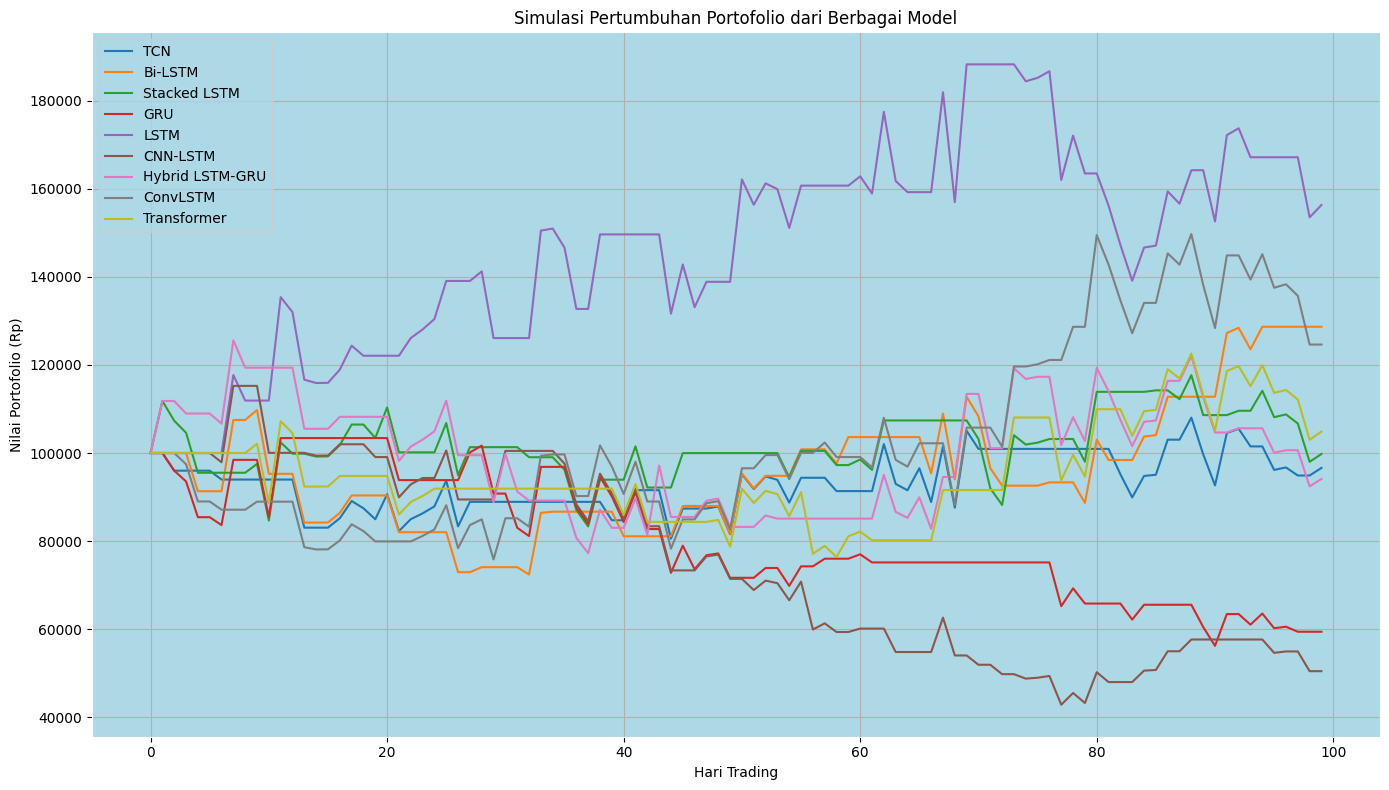

In [ ]:
# Visualisasi kurva pertumbuhan portofolio
plt.figure(figsize=(14, 8))
for model, result in backtest_results.items():
    plt.plot(result['portfolio_curve'], label=model)

plt.title('Simulasi Pertumbuhan Portofolio dari Berbagai Model')
plt.xlabel('Hari Trading')
plt.ylabel('Nilai Portofolio (Rp)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
backtest_summary.reset_index().rename(columns={'index': 'Model'})

,Model,Final Portfolio Value,Total Return (%),Sharpe Ratio,Max Drawdown
0,LSTM,156348.110634,56.348111,1.604447,49160.514104
1,Bi-LSTM,128684.105409,28.684105,1.137933,37371.965724
2,ConvLSTM,124641.342943,24.641343,1.044342,25089.020054
3,Transformer,104875.166144,4.875166,0.583443,30852.337366
4,Stacked LSTM,99784.652622,-0.215347,0.413423,28506.525239
5,TCN,96617.675047,-3.382325,0.321766,19450.880143
6,Hybrid LSTM-GRU,94110.582420,-5.889418,0.379283,48337.518771
7,GRU,59395.235805,-40.604764,-1.005459,47207.484071
8,CNN-LSTM,50435.380884,-49.564619,-1.471589,72433.618449
